In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
L_arr = np.array([.762, .765, .770])  # length values for steel


T_steel = np.array([1.7567, 1.758, 1.7625])  # Period values for steel
sigma_T_steel = np.array([.0007,.0006,.0006])  # Uncertainties in steel periods

T_aluminum = np.array([1.7595, 1.760, 1.7633])  # Period values for aluminum
sigma_T_aluminum = np.array([.0008,.0005,.0006])  # Uncertainties in aluminum periods

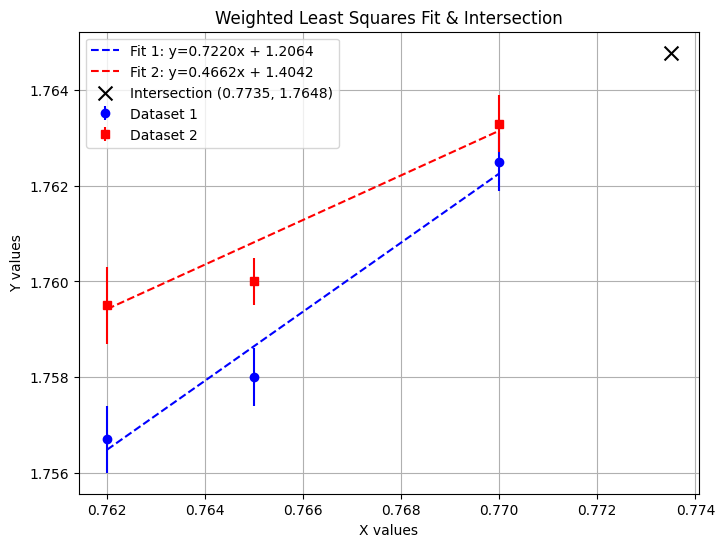

In [4]:

def linear_model(x, a, b):
    """Linear function y = a*x + b."""
    return a * x + b

def fit_weighted_least_squares(x, y, sigma_y):
    """Fits a weighted least squares regression line to the data."""
    popt, pcov = curve_fit(linear_model, x, y, sigma=1/sigma_y**2, absolute_sigma=True)
    slope, intercept = popt
    slope_err, intercept_err = np.sqrt(np.diag(pcov))
    return slope, intercept, slope_err, intercept_err

def find_intersection(m1, b1, m2, b2):
    """Finds the intersection of two lines y = m1*x + b1 and y = m2*x + b2."""
    if m1 == m2:
        raise ValueError("The lines are parallel and do not intersect.")
    x_intersect = (b2 - b1) / (m1 - m2)
    y_intersect = m1 * x_intersect + b1
    return x_intersect, y_intersect


m1, b1, m1_err, b1_err = fit_weighted_least_squares(L_arr, T_steel, sigma_T_steel)
m2, b2, m2_err, b2_err = fit_weighted_least_squares(L_arr, T_aluminum, sigma_T_aluminum)

# Compute intersection
x_int, y_int = find_intersection(m1, b1, m2, b2)

# Plot data and fits
plt.figure(figsize=(8, 6))

# First dataset
plt.errorbar(L_arr, T_steel, yerr=sigma_T_steel, fmt='o', label="Dataset 1", color='blue')
plt.plot(L_arr, linear_model(L_arr, m1, b1), '--', color='blue', label=f"Fit 1: y={m1:.4f}x + {b1:.4f}")

# Second dataset
plt.errorbar(L_arr, T_aluminum, yerr=sigma_T_aluminum, fmt='s', label="Dataset 2", color='red')
plt.plot(L_arr, linear_model(L_arr, m2, b2), '--', color='red', label=f"Fit 2: y={m2:.4f}x + {b2:.4f}")

# Intersection point
plt.scatter(x_int, y_int, color='black', marker='x', s=100, label=f"Intersection ({x_int:.4f}, {y_int:.4f})")

# Labels and legend
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Weighted Least Squares Fit & Intersection")
plt.legend()
plt.grid(True)



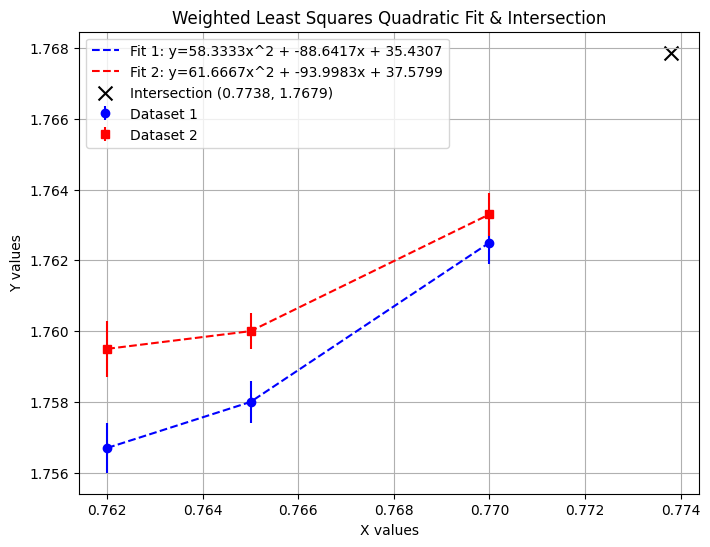

In [5]:
def quadratic_model(x, a, b, c):
    """Quadratic function y = ax^2 + bx + c."""
    return a * x**2 + b * x + c

def fit_weighted_least_squares_quadratic(x, y, sigma_y):
    """Fits a weighted least squares quadratic regression to the data."""
    popt, pcov = curve_fit(quadratic_model, x, y, sigma=1/sigma_y**2, absolute_sigma=True)
    a, b, c = popt
    a_err, b_err, c_err = np.sqrt(np.diag(pcov))
    return a, b, c, a_err, b_err, c_err

def find_intersection_quadratic(a1, b1, c1, a2, b2, c2):
    """Finds the intersection of two quadratics y = a1*x^2 + b1*x + c1 and y = a2*x^2 + b2*x + c2."""
    # Solve a1*x^2 + b1*x + c1 = a2*x^2 + b2*x + c2
    # => (a1 - a2) * x^2 + (b1 - b2) * x + (c1 - c2) = 0
    a_diff = a1 - a2
    b_diff = b1 - b2
    c_diff = c1 - c2
    
    # Quadratic equation: a_diff*x^2 + b_diff*x + c_diff = 0
    discriminant = b_diff**2 - 4*a_diff*c_diff
    
    if discriminant < 0:
        raise ValueError("The quadratics do not intersect.")
    
    # Calculate the first root
    x_intersect = (-b_diff + np.sqrt(discriminant)) / (2 * a_diff)
    
    # Find the corresponding y-value
    y_intersect = quadratic_model(x_intersect, a1, b1, c1)
    
    return x_intersect, y_intersect

# Fit data to quadratic models
a1, b1, c1, a1_err, b1_err, c1_err = fit_weighted_least_squares_quadratic(L_arr, T_steel, sigma_T_steel)
a2, b2, c2, a2_err, b2_err, c2_err = fit_weighted_least_squares_quadratic(L_arr, T_aluminum, sigma_T_aluminum)

# Compute the first intersection
x_int, y_int = find_intersection_quadratic(a1, b1, c1, a2, b2, c2)

# Plot data and quadratic fits
plt.figure(figsize=(8, 6))

# First dataset
plt.errorbar(L_arr, T_steel, yerr=sigma_T_steel, fmt='o', label="Dataset 1", color='blue')
plt.plot(L_arr, quadratic_model(L_arr, a1, b1, c1), '--', color='blue', label=f"Fit 1: y={a1:.4f}x^2 + {b1:.4f}x + {c1:.4f}")

# Second dataset
plt.errorbar(L_arr, T_aluminum, yerr=sigma_T_aluminum, fmt='s', label="Dataset 2", color='red')
plt.plot(L_arr, quadratic_model(L_arr, a2, b2, c2), '--', color='red', label=f"Fit 2: y={a2:.4f}x^2 + {b2:.4f}x + {c2:.4f}")

# Intersection point
plt.scatter(x_int, y_int, color='black', marker='x', s=100, label=f"Intersection ({x_int:.4f}, {y_int:.4f})")

# Labels and legend
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Weighted Least Squares Quadratic Fit & Intersection")
plt.legend()
plt.grid(True)
plt.show()


In [6]:
# fine tuning:

L_arr_fine = np.array([.120, .125])  # length values for steel


T_steel_fine = np.array([1.76432, 1.76378])  # Period values for steel
sigma_T_steel_fine = np.array([.00032,.00027])  # Uncertainties in steel periods

T_aluminum_fine = np.array([1.76482, 1.76451])  # Period values for aluminum
sigma_T_aluminum_fine = np.array([.00032,.00042])  # Uncertainties in aluminum periods

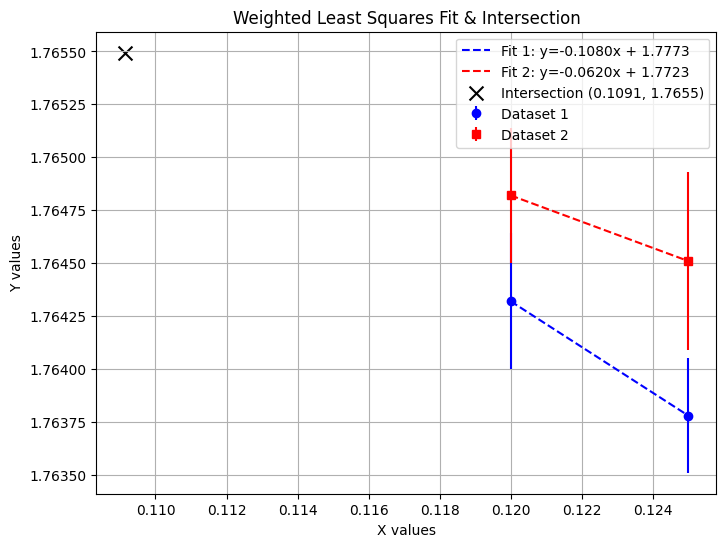

In [8]:
m1, b1, m1_err, b1_err = fit_weighted_least_squares(L_arr_fine, T_steel_fine, sigma_T_steel_fine)
m2, b2, m2_err, b2_err = fit_weighted_least_squares(L_arr_fine, T_aluminum_fine, sigma_T_aluminum_fine)

# Compute intersection
x_int, y_int = find_intersection(m1, b1, m2, b2)

# Plot data and fits
plt.figure(figsize=(8, 6))

# First dataset
plt.errorbar(L_arr_fine, T_steel_fine, yerr=sigma_T_steel_fine, fmt='o', label="Dataset 1", color='blue')
plt.plot(L_arr_fine, linear_model(L_arr_fine, m1, b1), '--', color='blue', label=f"Fit 1: y={m1:.4f}x + {b1:.4f}")

# Second dataset
plt.errorbar(L_arr_fine, T_aluminum_fine, yerr=sigma_T_aluminum_fine, fmt='s', label="Dataset 2", color='red')
plt.plot(L_arr_fine, linear_model(L_arr_fine, m2, b2), '--', color='red', label=f"Fit 2: y={m2:.4f}x + {b2:.4f}")

# Intersection point
plt.scatter(x_int, y_int, color='black', marker='x', s=100, label=f"Intersection ({x_int:.4f}, {y_int:.4f})")

# Labels and legend
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Weighted Least Squares Fit & Intersection")
plt.legend()
plt.grid(True)